### Import Data

In [18]:
import pandas as pd

url_1 = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-10/PFW_2021_public.csv"
url_2 = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-10/PFW_count_site_data_public_2021.csv"

df_pfw_2021 = pd.read_csv(url_1)
df_pfw_count_site_2021 = pd.read_csv(url_2)

print("First DataFrame (df_pfw_2021) head:")
print(df_pfw_2021.head())
print("\nSecond DataFrame (df_pfw_count_site_2021) head:")
print(df_pfw_count_site_2021.head())

First DataFrame (df_pfw_2021) head:
      loc_id   latitude   longitude subnational1_code  \
0    L981010  52.129760 -122.135470             CA-BC   
1   L3161698  43.832207 -123.092405             US-OR   
2  L13210778  39.721470  -75.933660             US-MD   
3  L13258348  42.217874  -83.672300             US-MI   
4    L149639  32.749921  -79.941582             US-SC   

            entry_technique     sub_id         obs_id  Month  Day  Year  ...  \
0  POSTCODE LAT/LONG LOOKUP  S83206450  OBS1092604618      3    4  2021  ...   
1       /GOOGLE_MAP/ZOOM:18  S78031190  OBS1036509564     12   19  2020  ...   
2       /GOOGLE_MAP/ZOOM:15  S81318993  OBS1073386105      2   13  2021  ...   
3       /GOOGLE_MAP/ZOOM:15  S79251313  OBS1051702542      1   13  2021  ...   
4           PointMaker1.0_2  S79183993  OBS1050809672      1   11  2021  ...   

  how_many valid  reviewed  day1_am  day1_pm  day2_am  day2_pm  \
0       20     1         0        1        0        1        0   
1       

### Merge Data

In [19]:
df_merged = pd.merge(df_pfw_2021, df_pfw_count_site_2021, on='loc_id', how='inner')
print("Merged DataFrame head:")
print(df_merged.head())

Merged DataFrame head:
    loc_id  latitude  longitude subnational1_code           entry_technique  \
0  L981010  52.12976 -122.13547             CA-BC  POSTCODE LAT/LONG LOOKUP   
1  L981010  52.12976 -122.13547             CA-BC  POSTCODE LAT/LONG LOOKUP   
2  L981010  52.12976 -122.13547             CA-BC  POSTCODE LAT/LONG LOOKUP   
3  L981010  52.12976 -122.13547             CA-BC  POSTCODE LAT/LONG LOOKUP   
4  L981010  52.12976 -122.13547             CA-BC  POSTCODE LAT/LONG LOOKUP   

      sub_id         obs_id  Month  Day  Year  ... numfeeders_platfrm  \
0  S83206450  OBS1092604618      3    4  2021  ...                NaN   
1  S83206450  OBS1092604618      3    4  2021  ...                NaN   
2  S83206450  OBS1092604618      3    4  2021  ...                NaN   
3  S83206450  OBS1092604618      3    4  2021  ...                0.0   
4  S83206450  OBS1092604618      3    4  2021  ...                0.0   

  numfeeders_humming  numfeeders_water  numfeeders_thistle  num

# EDA

## Initial Data Inspection



In [20]:
print("Shape of df_merged:", df_merged.shape)
print("\nInfo of df_merged:")
df_merged.info()
print("\nDescriptive statistics of df_merged:")
print(df_merged.describe())

Shape of df_merged: (505103, 83)

Info of df_merged:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505103 entries, 0 to 505102
Data columns (total 83 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loc_id                        505103 non-null  object 
 1   latitude                      505103 non-null  float64
 2   longitude                     505103 non-null  float64
 3   subnational1_code             505103 non-null  object 
 4   entry_technique               482593 non-null  object 
 5   sub_id                        505103 non-null  object 
 6   obs_id                        505103 non-null  object 
 7   Month                         505103 non-null  int64  
 8   Day                           505103 non-null  int64  
 9   Year                          505103 non-null  int64  
 10  PROJ_PERIOD_ID                505103 non-null  object 
 11  species_code                  505103 non-null  obje

## Missing Values Analysis


Top 20 Columns with Missing Values (%):
numfeeders_thistle    89.278028
numfeeders_water      88.793375
numfeeders_hanging    88.136875
fed_yr_round          52.283990
hab_park              33.140171
numfeeders_other      28.939444
hab_swamp             28.437962
numfeeders_fruit      20.773387
numfeeders_hopper     19.421187
numfeeders_humming    16.715601
numfeeders_tube       15.279062
hab_desert_scrub      12.615249
hab_water_salt        12.587532
hab_marsh             12.367577
hab_orchard           12.304421
hab_industrial        11.189995
hab_evgr_woods        11.033195
numfeeders_platfrm    10.952222
hab_young_woods       10.103286
numfeeders_ground      9.856999
dtype: float64


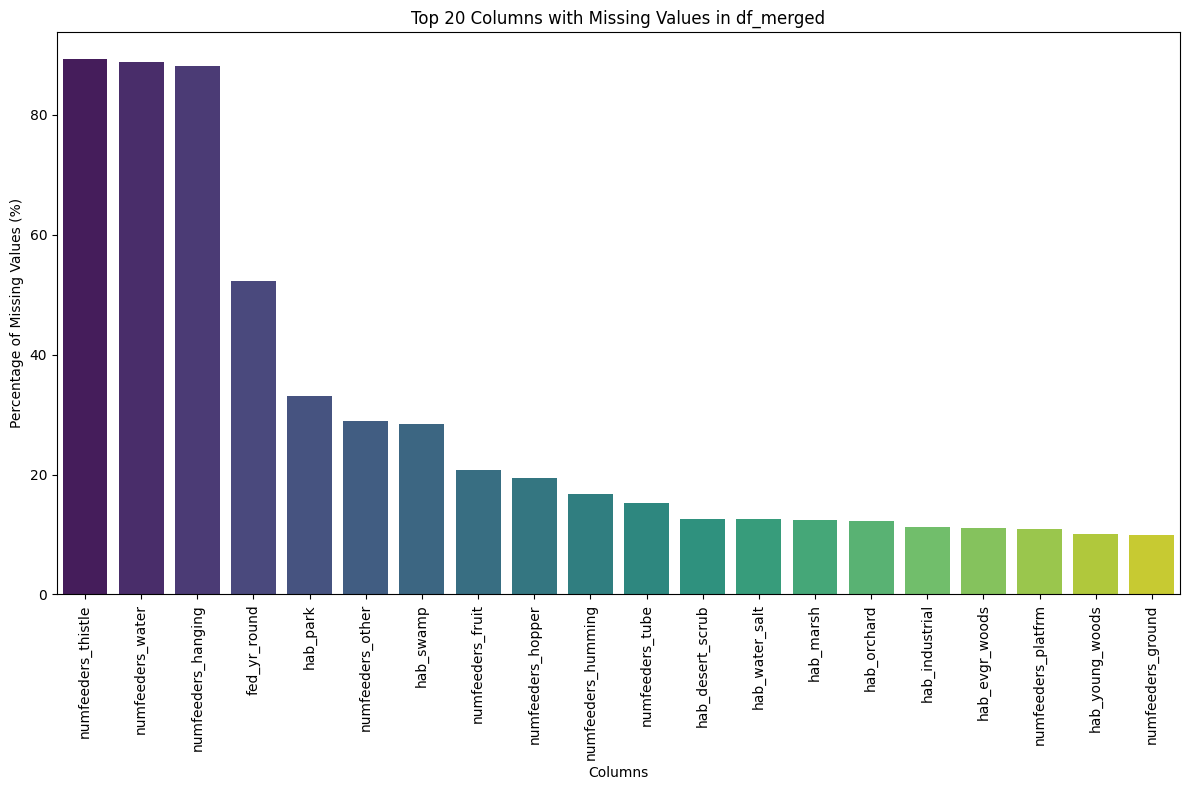

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of missing values
missing_percentages = df_merged.isnull().sum() / len(df_merged) * 100

# Filter to include only columns with missing values and sort in descending order
missing_percentages = missing_percentages[missing_percentages > 0].sort_values(ascending=False)

# Display the top 20 columns with the highest percentage of missing values
print("Top 20 Columns with Missing Values (%):")
print(missing_percentages.head(20))

# Create a bar plot for the top 20 missing values
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_percentages.head(20).index, y=missing_percentages.head(20).values, hue=missing_percentages.head(20).index, palette='viridis', legend=False)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values (%)')
plt.title('Top 20 Columns with Missing Values in df_merged')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Unique Values and Cardinality



In [22]:
unique_counts = {}
for col in df_merged.columns:
    unique_counts[col] = df_merged[col].nunique()

unique_counts_df = pd.Series(unique_counts).sort_values(ascending=False)
print("Number of unique values for each column (sorted descending):\n", unique_counts_df)

print("\n--- Unique values for columns with less than 20 unique values ---")
for col, count in unique_counts_df.items():
    if count > 0 and count < 20:
        print(f"\nColumn: {col} (Unique Count: {count})")
        print(df_merged[col].unique())
    elif count == 0:
        print(f"\nColumn: {col} (Unique Count: {count}) - All NaN")

Number of unique values for each column (sorted descending):
 obs_id            95737
sub_id            77363
loc_id            14167
longitude         14115
latitude          14113
                  ...  
dogs                  2
fed_in_dec            2
fed_in_nov            2
fed_in_oct            2
PROJ_PERIOD_ID        1
Length: 83, dtype: int64

--- Unique values for columns with less than 20 unique values ---

Column: numfeeders_fruit (Unique Count: 16)
[ nan   0.   1.   3.   7.   4.   6.   8.   2.   5.  12.  27. 112.  10.
  56.  60.   9.]

Column: numfeeders_water (Unique Count: 11)
[nan  3.  0.  2.  1.  4.  8.  6.  5. 11. 10.  7.]

Column: numfeeders_thistle (Unique Count: 11)
[nan  1.  3.  2.  0.  4.  5. 11.  6.  8.  7. 12.]

Column: Data_Entry_Method (Unique Count: 8)
['PFW Web 4.1.4' 'PFW Mobile App v1.1.17' 'PFW Web 4.0.4'
 'PFW Mobile App v1.1.16' 'PFW Mobile App v1.1.14'
 'PFW Mobile App vGLOBAL_APP_VER_SHORT' 'PFW Web 4.0.2'
 'PFW Mobile App v1.1.0']

Column: Month (Uniqu

## Distribution Analysis of Numerical Features




In [23]:
numerical_cols = df_merged.select_dtypes(include=['int64', 'float64']).columns

# Filter out columns with 2 or fewer unique values as they are likely binary or very low cardinality
# and histograms won't be informative for distribution analysis
filtered_numerical_cols = [col for col in numerical_cols if df_merged[col].nunique() > 2]

print("Selected numerical columns for distribution analysis:")
print(filtered_numerical_cols)

Selected numerical columns for distribution analysis:
['latitude', 'longitude', 'Month', 'Day', 'how_many', 'effort_hrs_atleast', 'snow_dep_atleast', 'evgr_trees_atleast', 'evgr_shrbs_atleast', 'dcid_trees_atleast', 'dcid_shrbs_atleast', 'fru_trees_atleast', 'cacti_atleast', 'brsh_piles_atleast', 'water_srcs_atleast', 'bird_baths_atleast', 'housing_density', 'numfeeders_suet', 'numfeeders_ground', 'numfeeders_hanging', 'numfeeders_platfrm', 'numfeeders_humming', 'numfeeders_water', 'numfeeders_thistle', 'numfeeders_fruit', 'numfeeders_hopper', 'numfeeders_tube', 'numfeeders_other', 'population_atleast', 'count_area_size_sq_m_atleast']


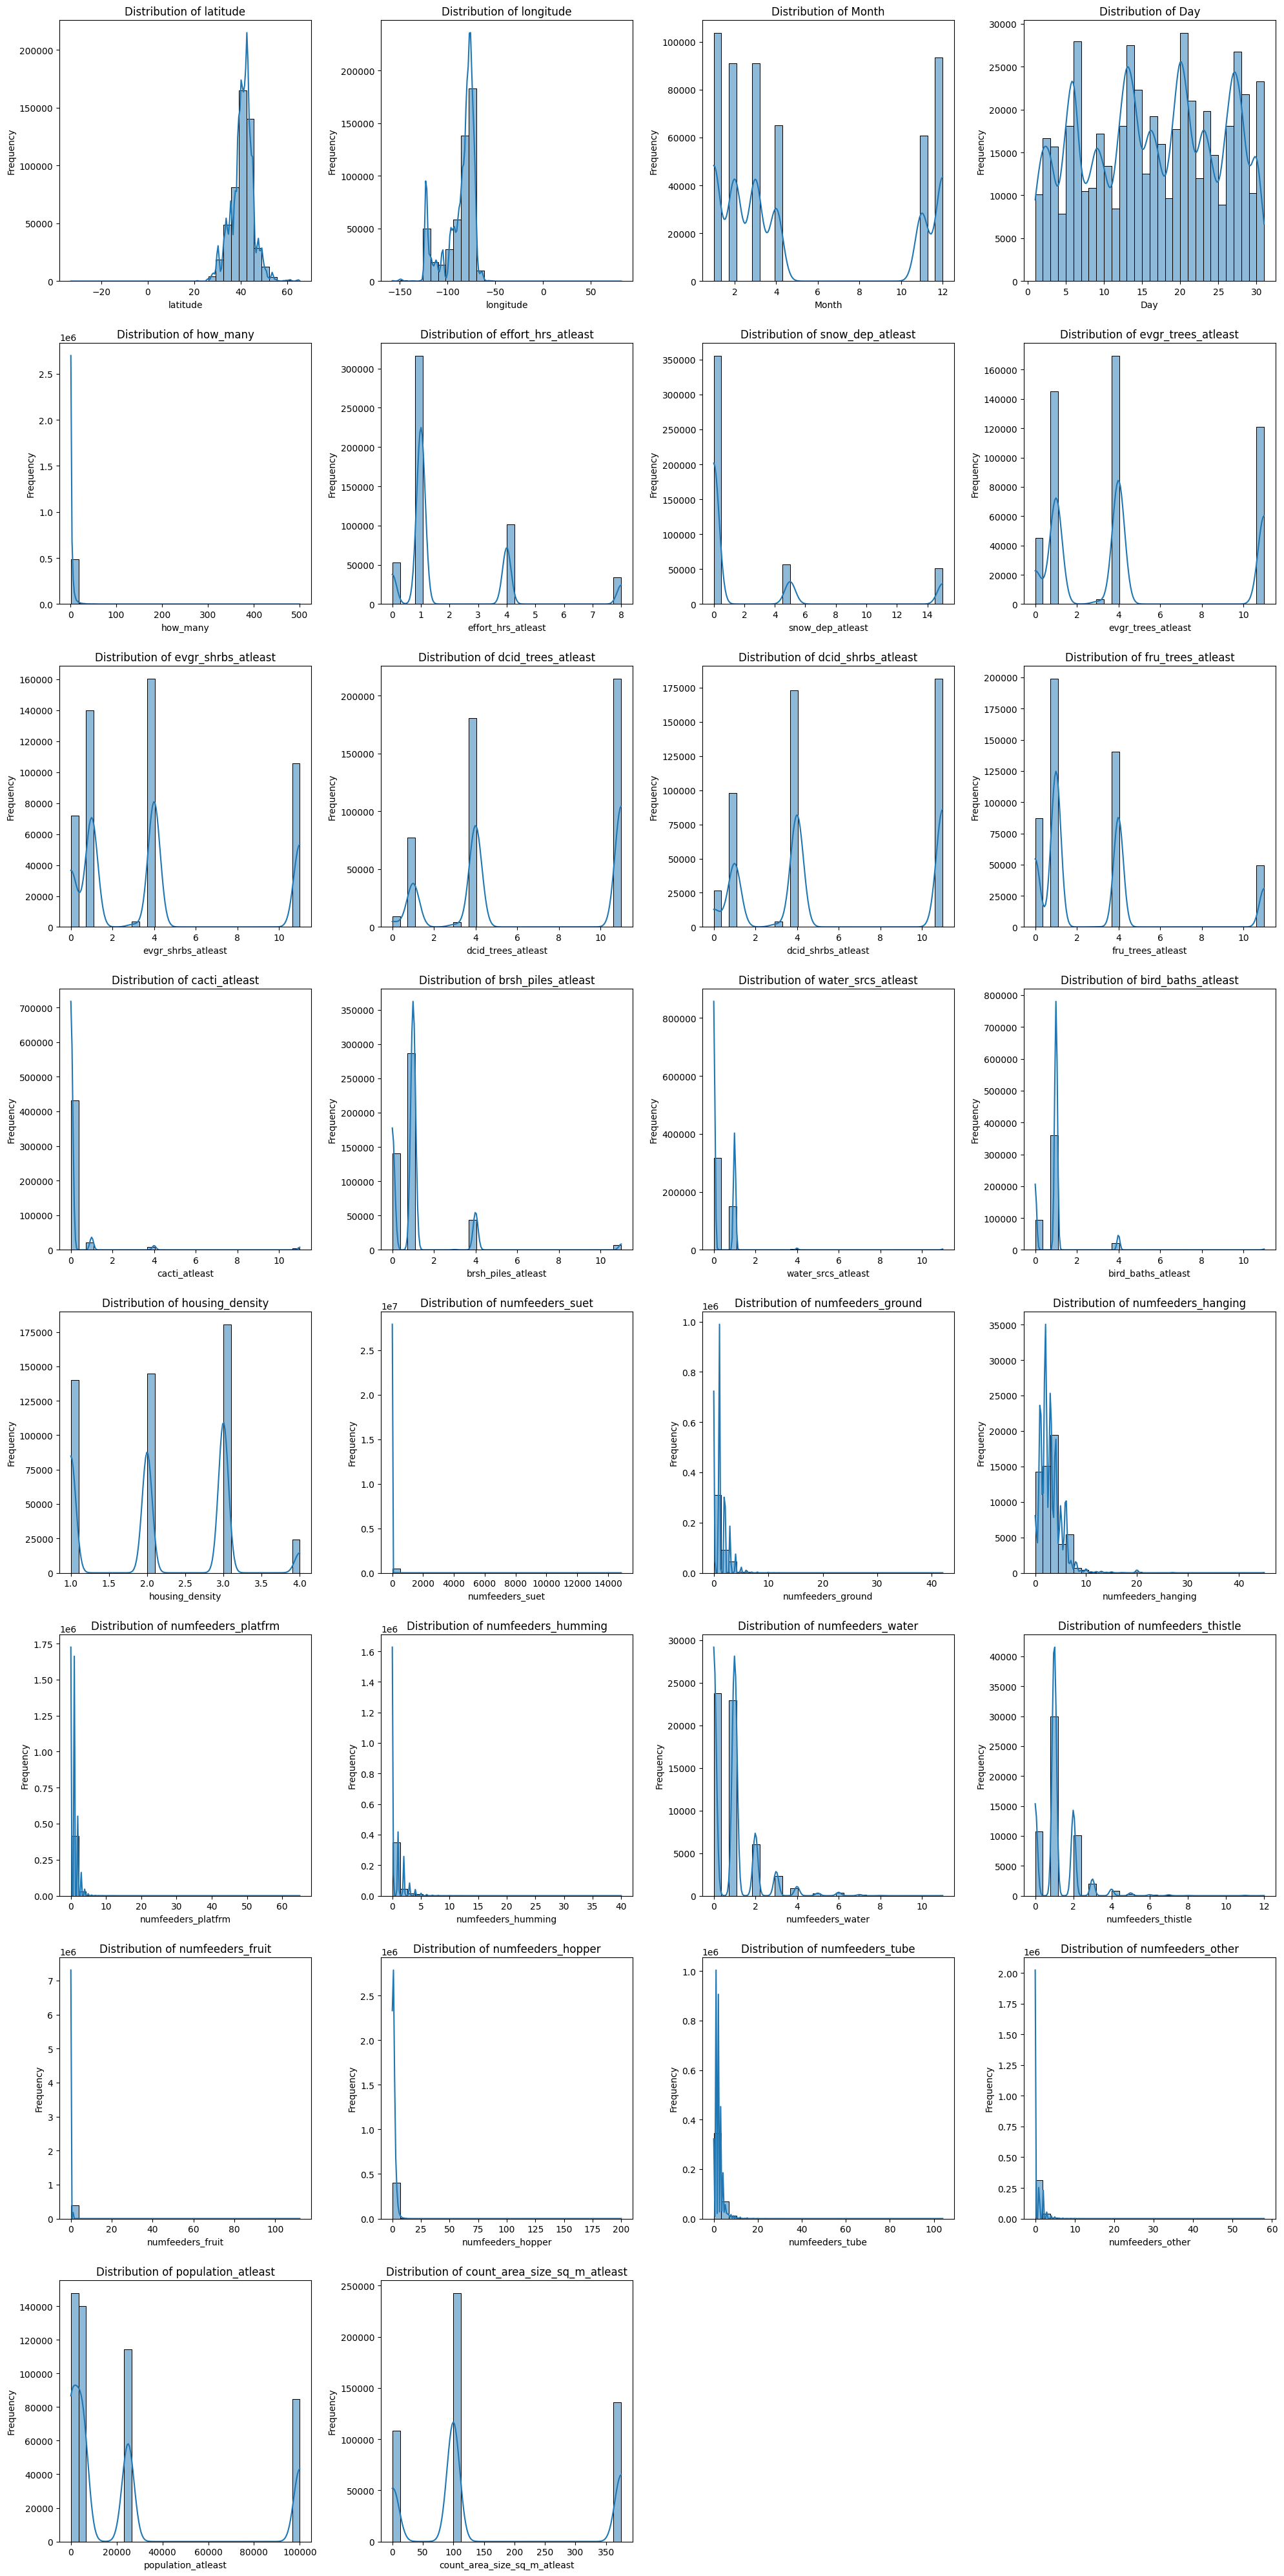

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Determine the number of rows and columns for subplots
num_cols = len(filtered_numerical_cols)
num_rows = int(np.ceil(num_cols / 4)) # 4 plots per row

plt.figure(figsize=(20, 5 * num_rows))

for i, col in enumerate(filtered_numerical_cols):
    plt.subplot(num_rows, 4, i + 1) # Create subplots in a grid
    sns.histplot(df_merged[col].dropna(), kde=True, bins=30) # Plot histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Distribution Analysis of Categorical Features


In [9]:
categorical_cols = []

# Add object type columns, excluding identifiers
object_cols = df_merged.select_dtypes(include='object').columns
exclude_object_cols = ['loc_id', 'sub_id', 'obs_id', 'PROJ_PERIOD_ID']
for col in object_cols:
    if col not in exclude_object_cols:
        categorical_cols.append(col)

# Add numerical columns with unique values > 2 and < 20, excluding 'Year', 'Month', and those already identified as binary
# Also exclude latitude and longitude as they are numerical identifiers and not categorical
numerical_cols = df_merged.select_dtypes(include=['int64', 'float64']).columns
exclude_numerical_cols_from_categorical = ['Year', 'latitude', 'longitude']

for col in numerical_cols:
    if col not in exclude_numerical_cols_from_categorical:
        num_unique = df_merged[col].nunique()
        # Include columns with 3 to 19 unique values for categorical analysis
        if num_unique > 2 and num_unique < 20:
            if col not in categorical_cols: # Avoid duplicates if already added from object_cols
                categorical_cols.append(col)

# Ensure 'Month' is included if it meets the criteria and wasn't already
if 'Month' in numerical_cols and df_merged['Month'].nunique() > 2 and 'Month' not in categorical_cols:
    categorical_cols.append('Month')

# Sort for consistent plotting order
categorical_cols.sort()

print("Identified Categorical Columns for Distribution Analysis:")
print(categorical_cols)

Identified Categorical Columns for Distribution Analysis:
['Data_Entry_Method', 'Month', 'bird_baths_atleast', 'brsh_piles_atleast', 'cacti_atleast', 'count_area_size_sq_m_atleast', 'dcid_shrbs_atleast', 'dcid_trees_atleast', 'effort_hrs_atleast', 'entry_technique', 'evgr_shrbs_atleast', 'evgr_trees_atleast', 'fru_trees_atleast', 'housing_density', 'numfeeders_fruit', 'numfeeders_thistle', 'numfeeders_water', 'population_atleast', 'proj_period_id', 'snow_dep_atleast', 'species_code', 'subnational1_code', 'water_srcs_atleast']


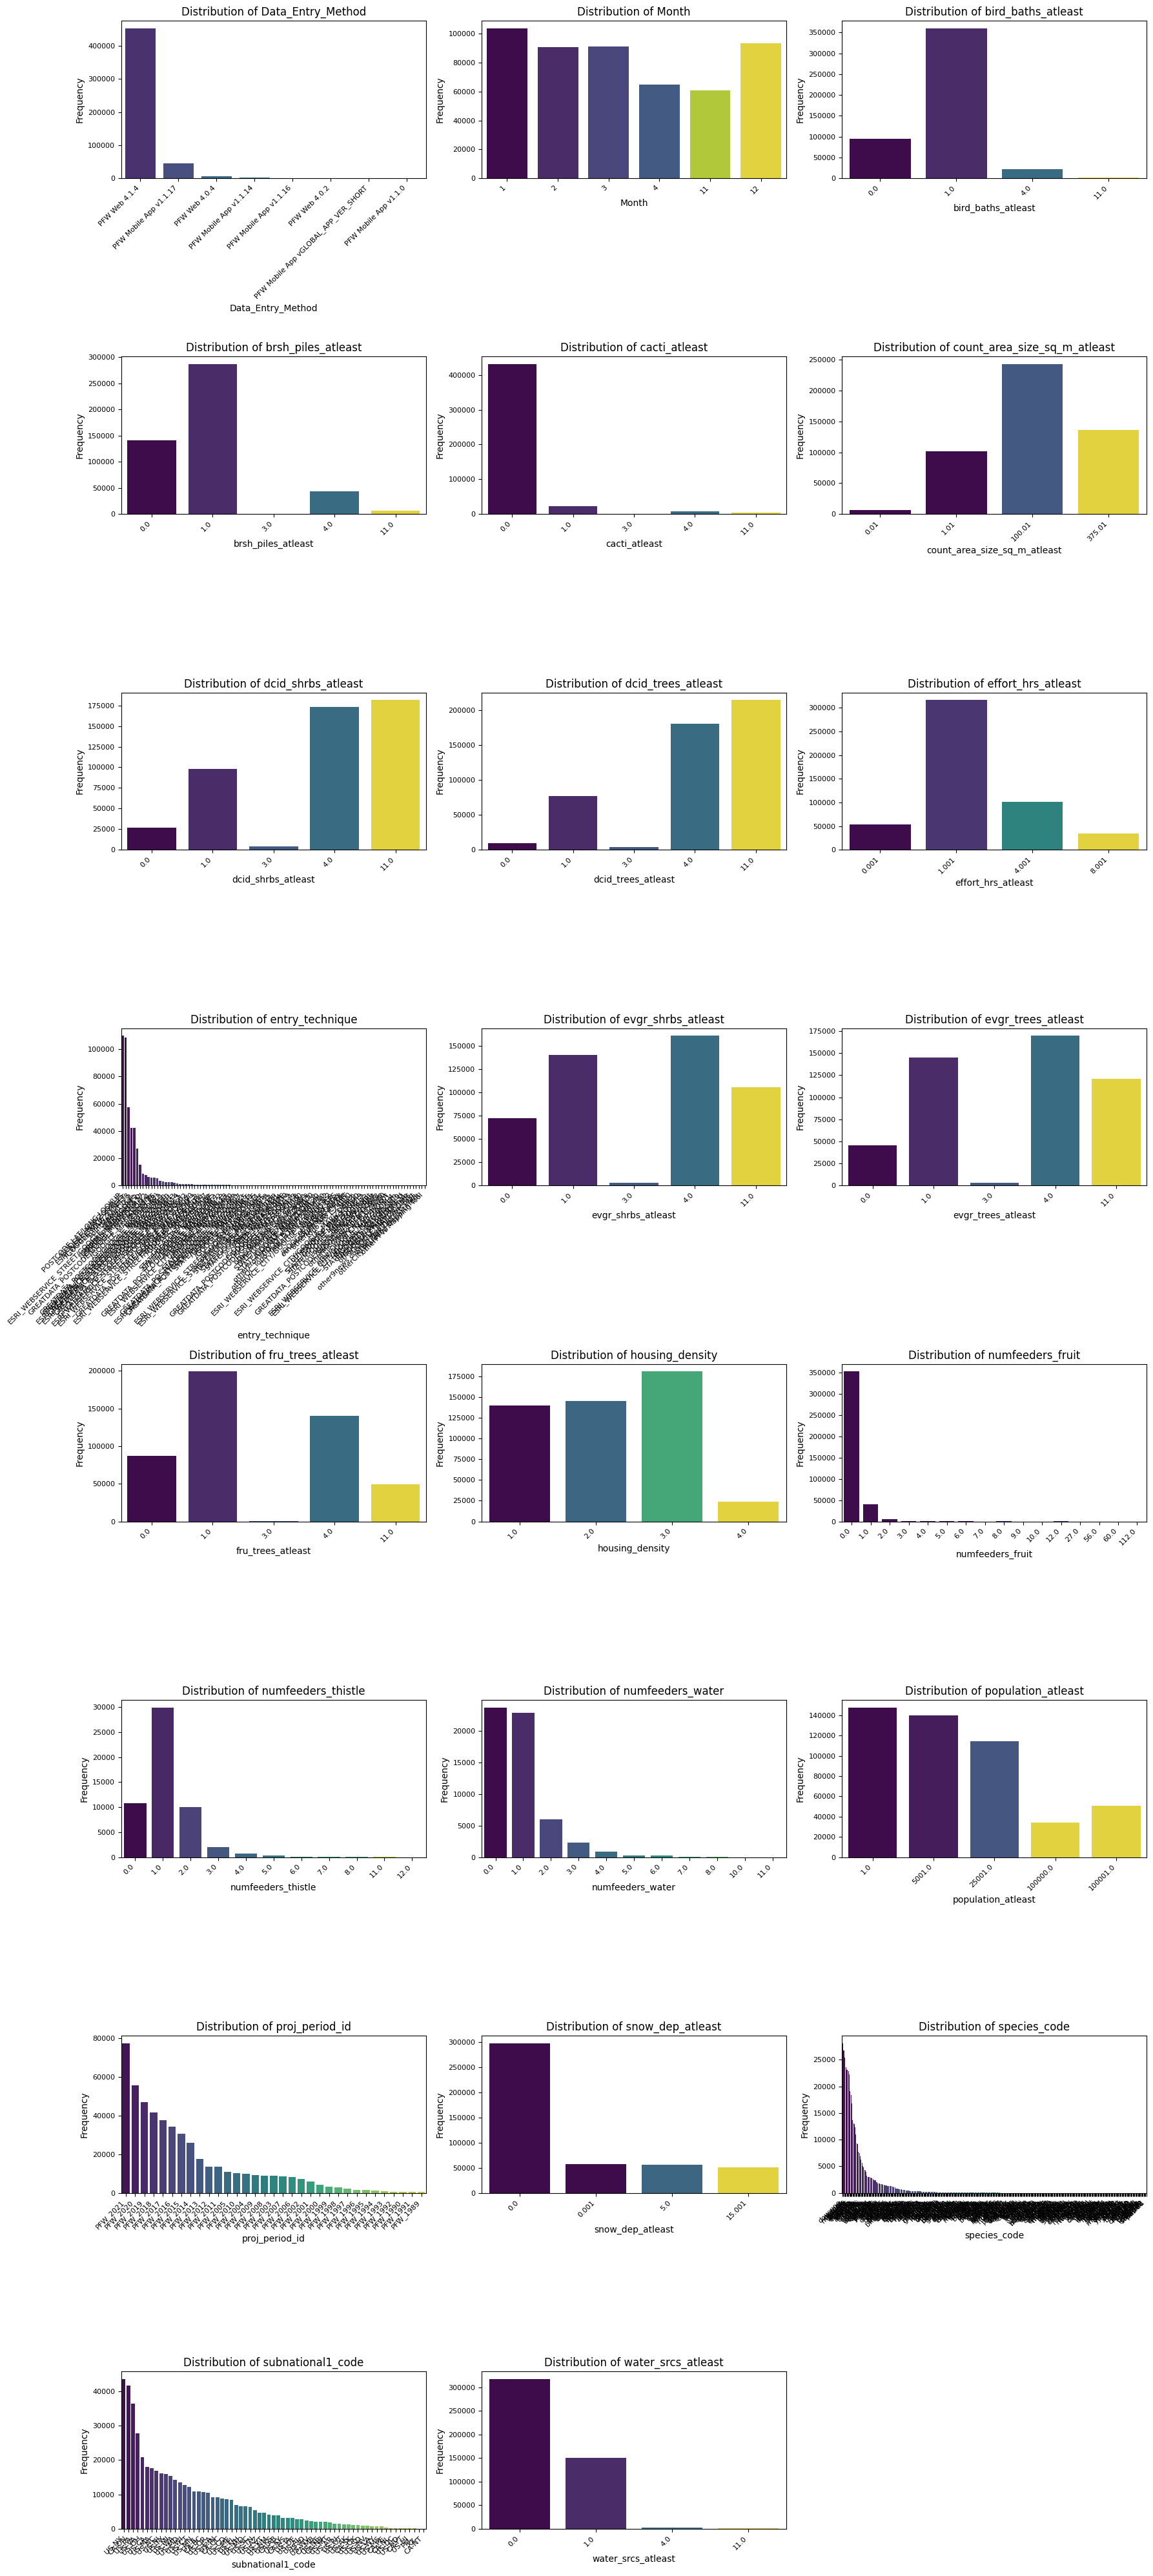

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Determine the number of rows and columns for subplots dynamically
# We will aim for a maximum of 3 plots per row for better readability
num_plots = len(categorical_cols)
num_cols_grid = 3
num_rows_grid = int(np.ceil(num_plots / num_cols_grid))

plt.figure(figsize=(num_cols_grid * 6, num_rows_grid * 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows_grid, num_cols_grid, i + 1)

    # Get value counts, including NaN values
    value_counts = df_merged[col].value_counts(dropna=False)

    # Create a bar plot
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis', hue=value_counts.index, legend=False)

    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


## Summary:

### Data Analysis Key Findings

*   The `df_merged` DataFrame is substantial, containing 505,103 rows and 83 columns. It is composed of 64 `float64`, 10 `int64`, and 9 `object` data types.
*   **Missing Data is Extensive**: A significant portion of the DataFrame suffers from missing values. The top 5 columns with the highest percentage of missing values are:
    *   `numfeeders_thistle`: 89.28%
    *   `numfeeders_water`: 88.79%
    *   `numfeeders_hanging`: 88.14%
    *   `fed_yr_round`: 52.28%
    *   `hab_park`: 33.14%
    Many other columns, particularly those related to habitat, feeder types, and auxiliary observations, also show substantial missingness.
*   **Cardinality Varies Widely**:
    *   High-cardinality columns include `obs_id`, `sub_id`, `loc_id`, `longitude`, and `latitude`, suggesting unique identifiers or continuous measurements.
    *   Numerous columns exhibit low cardinality (less than 20 unique values), indicating potential categorical or binary features (e.g., `numfeeders_fruit`, `Month`, various `hab_` and `fed_in_` columns, `cats`, `dogs`).
    *   The `PROJ_PERIOD_ID` column is constant with only one unique value (`'PFW_2021'`), providing no discriminatory information.
*   **Numerical Feature Distributions**: Visualizations for 30 selected numerical features revealed diverse distributions, with some columns (e.g., `how_many`, various `numfeeders_` columns) appearing right-skewed, while others like `latitude` and `longitude` show more complex patterns.
*   **Categorical Feature Distributions**: Distributions for 23 identified categorical columns (including `Data_Entry_Method`, `Month`, `species_code`, and several `_atleast` and `numfeeders_` columns) were visualized, showing the frequency of each category and the presence of `NaN` values.

### Insights or Next Steps

*   The substantial amount of missing data across key features necessitates careful handling, possibly through imputation strategies (e.g., mean, median, mode imputation) or by considering the implications of simply removing incomplete records or columns for downstream modeling.
*   The `PROJ_PERIOD_ID` column, being constant, should be considered for removal as it provides no analytical value.
*   Further investigation into the relationships between numerical features through correlation analysis (as per the next planned subtask) and between categorical features using methods like chi-squared tests would provide deeper insights for feature selection and modeling.


# Question 3 : Identify distinct state-level participation regimes based on temporal stability, effort distribution, and site turnover—and quantify which regimes are most vulnerable to producing biased or unreliable ecological inference?

## Data Preparation for State-Level Temporal Metrics



In [11]:
import numpy as np

# Filter df_merged for 2020 and 2021 data only to simplify operations
df_2020 = df_merged[df_merged['Year'] == 2020]
df_2021 = df_merged[df_merged['Year'] == 2021]

# Step 1: Extract unique loc_ids for each state and year
state_sites_2020 = {}
state_sites_2021 = {}

# Get all unique subnational1_codes
all_states = df_merged['subnational1_code'].unique()

for state in all_states:
    state_sites_2020[state] = set(df_2020[df_2020['subnational1_code'] == state]['loc_id'].unique())
    state_sites_2021[state] = set(df_2021[df_2021['subnational1_code'] == state]['loc_id'].unique())

# Step 2: Initialize an empty DataFrame, df_state_metrics
df_state_metrics = pd.DataFrame(index=all_states)

# Step 3 & 4: Iterate through each state and calculate metrics
for state in all_states:
    sites_2020 = state_sites_2020.get(state, set())
    sites_2021 = state_sites_2021.get(state, set())

    num_sites_2020 = len(sites_2020)
    num_sites_2021 = len(sites_2021)

    num_sites_both_years = len(sites_2020.intersection(sites_2021))
    num_sites_only_2020 = len(sites_2020.difference(sites_2021))
    num_sites_only_2021 = len(sites_2021.difference(sites_2020))

    df_state_metrics.loc[state, 'num_sites_2020'] = num_sites_2020
    df_state_metrics.loc[state, 'num_sites_2021'] = num_sites_2021
    df_state_metrics.loc[state, 'num_sites_both_years'] = num_sites_both_years
    df_state_metrics.loc[state, 'num_sites_only_2020'] = num_sites_only_2020
    df_state_metrics.loc[state, 'num_sites_only_2021'] = num_sites_only_2021

# Convert site count columns to integer type
df_state_metrics[['num_sites_2020', 'num_sites_2021', 'num_sites_both_years',
                  'num_sites_only_2020', 'num_sites_only_2021']] = \
    df_state_metrics[['num_sites_2020', 'num_sites_2021', 'num_sites_both_years',
                      'num_sites_only_2020', 'num_sites_only_2021']].astype(int)

# Step 6: Calculate average effort_hrs_atleast per observation for each state
avg_effort_per_observation = df_merged.groupby('subnational1_code')['effort_hrs_atleast'].mean().rename('avg_effort_per_observation')
df_state_metrics = df_state_metrics.merge(avg_effort_per_observation, left_index=True, right_index=True, how='left')

# Step 7: Calculate average effort_hrs_atleast per site for each state
site_level_avg_effort = df_merged.groupby('loc_id')['effort_hrs_atleast'].mean().rename('site_avg_effort')

# Merge site_level_avg_effort with df_merged to get state information for each site's average effort
site_effort_with_state = df_merged[['loc_id', 'subnational1_code']].drop_duplicates().merge(site_level_avg_effort, on='loc_id', how='left')

# Group by subnational1_code and compute the mean of site_avg_effort
avg_effort_per_site = site_effort_with_state.groupby('subnational1_code')['site_avg_effort'].mean().rename('avg_effort_per_site')
df_state_metrics = df_state_metrics.merge(avg_effort_per_site, left_index=True, right_index=True, how='left')

# Step 8 & 9: Calculate site turnover rates
df_state_metrics['turnover_rate_new_sites'] = df_state_metrics.apply(
    lambda row: row['num_sites_only_2021'] / row['num_sites_2021'] if row['num_sites_2021'] > 0 else np.nan, axis=1
)
df_state_metrics['turnover_rate_ceased_sites'] = df_state_metrics.apply(
    lambda row: row['num_sites_only_2020'] / row['num_sites_2020'] if row['num_sites_2020'] > 0 else np.nan, axis=1
)

# Step 10: Display the first few rows of the df_state_metrics DataFrame
print("State-level metrics (first 10 rows):")
print(df_state_metrics.head(10))

State-level metrics (first 10 rows):
       num_sites_2020  num_sites_2021  num_sites_both_years  \
CA-BC             262             317                   224   
US-OR             256             257                   205   
US-MD             280             315                   239   
US-MI             346             396                   302   
US-SC             108             129                    99   
CA-QC             195             236                   178   
US-CA             482             560                   416   
US-PA             641             727                   574   
US-NY             919            1053                   820   
US-NC             295             348                   275   

       num_sites_only_2020  num_sites_only_2021  avg_effort_per_observation  \
CA-BC                   38                   93                    1.761478   
US-OR                   51                   52                    1.753852   
US-MD                   41      

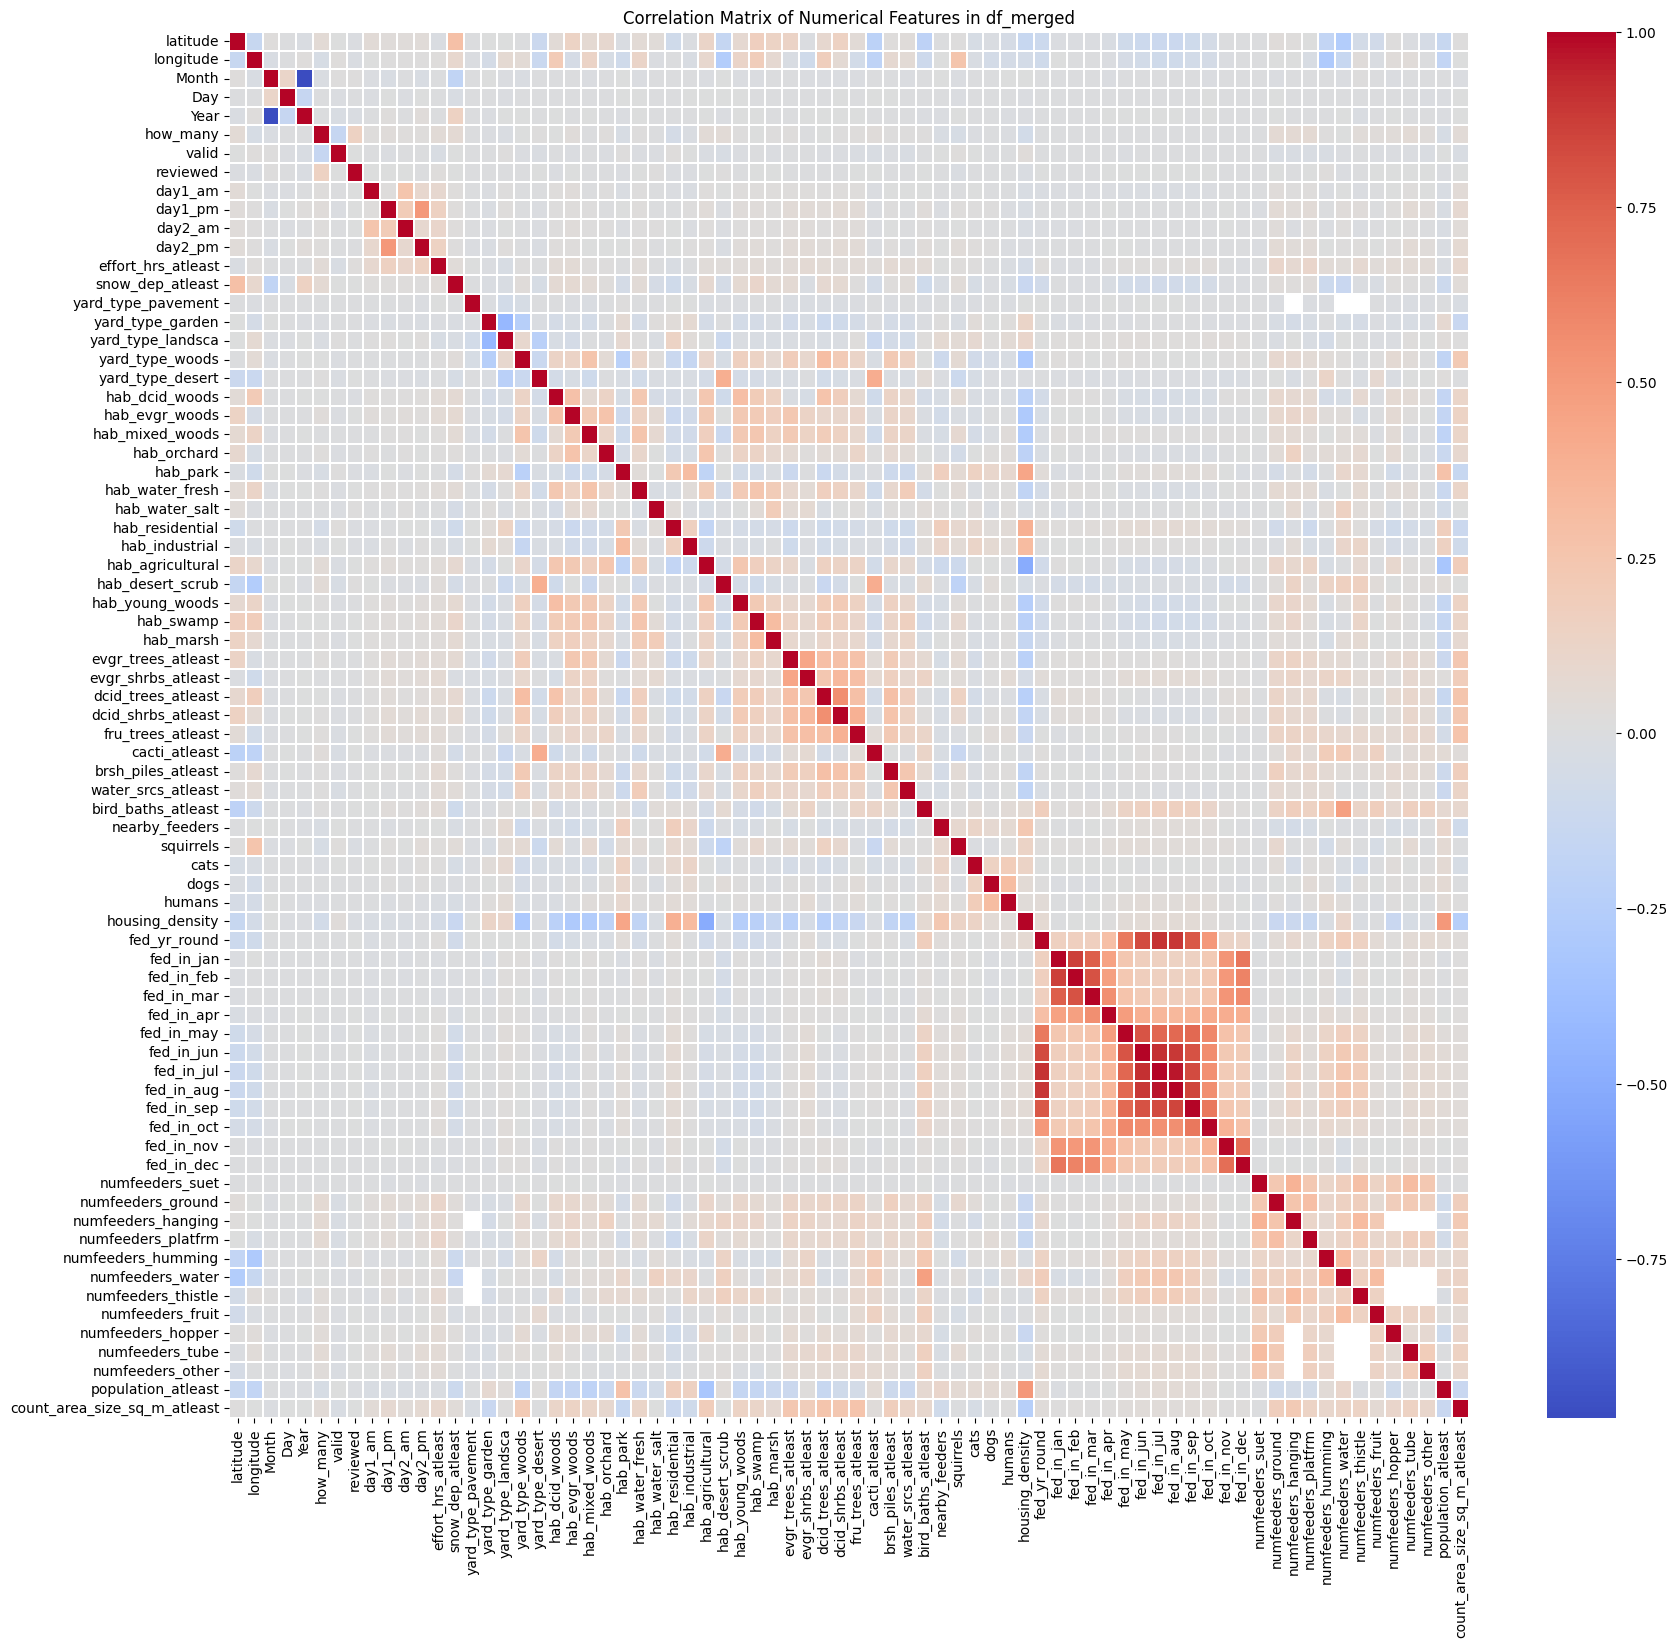

Top 10 highly correlated pairs (absolute value):
fed_in_jul  fed_in_aug      0.966306
fed_in_jun  fed_in_jul      0.911661
fed_in_jul  fed_yr_round    0.900928
fed_in_aug  fed_yr_round    0.898477
fed_in_jun  fed_in_aug      0.888676
fed_in_feb  fed_in_jan      0.861054
fed_in_sep  fed_in_aug      0.849342
fed_in_jul  fed_in_sep      0.825126
fed_in_jun  fed_yr_round    0.824863
fed_in_sep  fed_in_jun      0.804927
dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns from df_merged for correlation analysis
numerical_df = df_merged.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix of Numerical Features in df_merged')
plt.show()

print("Top 10 highly correlated pairs (absolute value):")
# Unstack the correlation matrix and drop self-correlations
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)

# Get top correlated pairs, excluding self-correlation (corr = 1)
top_correlated_pairs = sorted_pairs[sorted_pairs < 1].drop_duplicates().head(10)
print(top_correlated_pairs)

## Feature Engineering for Regime Identification



In [13]:
import numpy as np

# 1. Create a new DataFrame, named df_clustering_features, by selecting the specified columns
df_clustering_features = df_state_metrics[[
    'num_sites_2020',
    'num_sites_2021',
    'num_sites_both_years',
    'num_sites_only_2020',
    'num_sites_only_2021',
    'avg_effort_per_observation',
    'avg_effort_per_site',
    'turnover_rate_new_sites',
    'turnover_rate_ceased_sites'
]].copy()

# 2. Handle any missing values (NaNs) in the df_clustering_features DataFrame by filling them with 0.
df_clustering_features.fillna(0, inplace=True)

# 3. Display the first few rows of the df_clustering_features DataFrame
print("df_clustering_features Head:")
print(df_clustering_features.head())

# 4. Print the information about the df_clustering_features DataFrame
print("\ndf_clustering_features Info:")
df_clustering_features.info()

df_clustering_features Head:
       num_sites_2020  num_sites_2021  num_sites_both_years  \
CA-BC             262             317                   224   
US-OR             256             257                   205   
US-MD             280             315                   239   
US-MI             346             396                   302   
US-SC             108             129                    99   

       num_sites_only_2020  num_sites_only_2021  avg_effort_per_observation  \
CA-BC                   38                   93                    1.761478   
US-OR                   51                   52                    1.753852   
US-MD                   41                   76                    1.782142   
US-MI                   44                   94                    2.141651   
US-SC                    9                   30                    2.211140   

       avg_effort_per_site  turnover_rate_new_sites  \
CA-BC             1.483323                 0.293375   
US-OR  

## Identify State-Level Participation Regimes (Clustering)



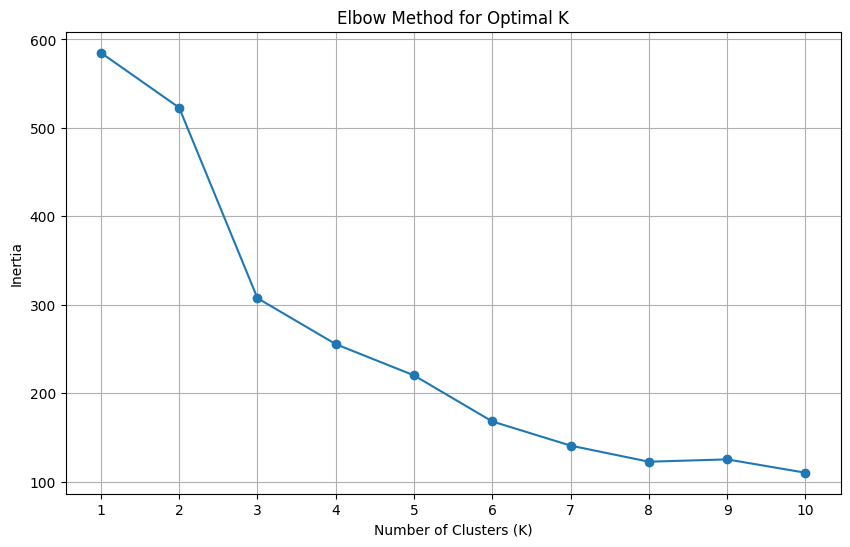

Scaled features head:
       num_sites_2020  num_sites_2021  num_sites_both_years  \
CA-BC        0.461166        0.491936              0.420728   
US-OR        0.431643        0.244093              0.315226   
US-MD        0.549735        0.483674              0.504019   
US-MI        0.874489        0.818262              0.853843   
US-SC       -0.296593       -0.284638             -0.273366   

       num_sites_only_2020  num_sites_only_2021  avg_effort_per_observation  \
CA-BC             0.748508             0.677590                   -0.387964   
US-OR             1.290487             0.036334                   -0.401547   
US-MD             0.873580             0.411703                   -0.351159   
US-MI             0.998652             0.693230                    0.289178   
US-SC            -0.460522            -0.307755                    0.412948   

       avg_effort_per_site  turnover_rate_new_sites  \
CA-BC            -0.574163                 0.108159   
US-OR         

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Standardize the features in the df_clustering_features DataFrame
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering_features)

# Store scaled data in a DataFrame for better readability and to preserve index
scaled_df = pd.DataFrame(scaled_features, columns=df_clustering_features.columns, index=df_clustering_features.index)

# 2. Apply the Elbow Method to determine the optimal number of clusters for K-Means.
inertia_values = []

# Loop through a range of possible cluster numbers (e.g., from 1 to 10)
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia_values against the number of clusters to visualize the elbow point.
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

print("Scaled features head:")
print(scaled_df.head())
print("Inertia values calculated for Elbow Method.")

K-Means model fitted with optimal_k = 3.
First 10 rows of df_clustering_features with new cluster_label:
       num_sites_2020  num_sites_2021  num_sites_both_years  \
CA-BC             262             317                   224   
US-OR             256             257                   205   
US-MD             280             315                   239   
US-MI             346             396                   302   
US-SC             108             129                    99   
CA-QC             195             236                   178   
US-CA             482             560                   416   
US-PA             641             727                   574   
US-NY             919            1053                   820   
US-NC             295             348                   275   

       num_sites_only_2020  num_sites_only_2021  avg_effort_per_observation  \
CA-BC                   38                   93                    1.761478   
US-OR                   51                 

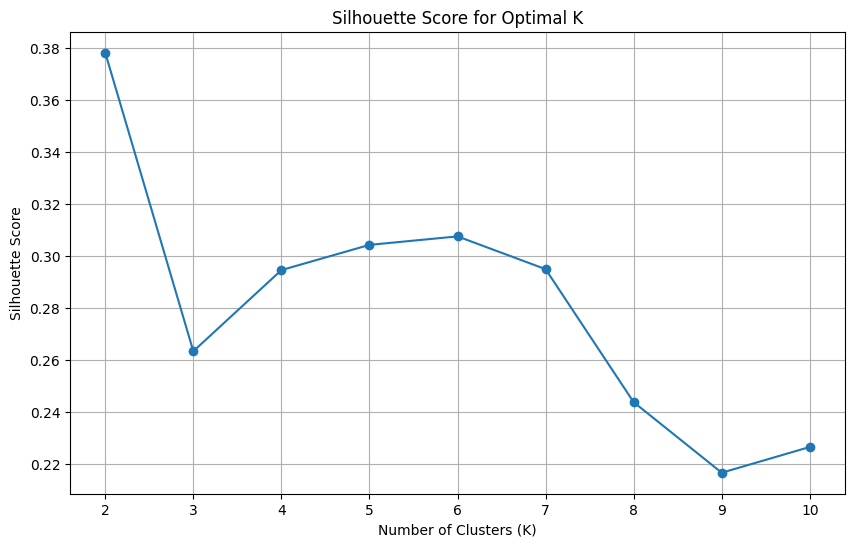

Silhouette scores calculated and plotted.


In [15]:
from sklearn.metrics import silhouette_score

# 3. Based on the Elbow Method's visualization, choose an optimal number of clusters, k.
# Assuming optimal k is 3 based on a typical elbow point where the decrease in inertia slows down.
# In a real scenario, this would be determined by visually inspecting the plot.
optimal_k = 3

# 4. Fit the KMeans model one more time using the chosen optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_optimal.fit(scaled_features)

# 5. Assign the cluster labels to a new column named 'cluster_label' in the original df_clustering_features DataFrame.
df_clustering_features['cluster_label'] = kmeans_optimal.labels_

print(f"K-Means model fitted with optimal_k = {optimal_k}.")
print("First 10 rows of df_clustering_features with new cluster_label:")
print(df_clustering_features.head(10))

# 6. Calculate the Silhouette Score for the same range of cluster numbers (e.g., 2 to 10).
silhouette_scores = []

# Loop through the range of cluster numbers (from 2 to 10, as Silhouette Score is not defined for a single cluster)
K_range_silhouette = range(2, 11)
for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette_scores against the number of clusters.
plt.figure(figsize=(10, 6))
plt.plot(K_range_silhouette, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range_silhouette)
plt.grid(True)
plt.show()

print("Silhouette scores calculated and plotted.")

In [16]:
print("Cluster Characteristics (Mean Values for Each Feature per Cluster):")
print(df_clustering_features.groupby('cluster_label').mean())

Cluster Characteristics (Mean Values for Each Feature per Cluster):
               num_sites_2020  num_sites_2021  num_sites_both_years  \
cluster_label                                                         
0                  332.235294      384.588235            291.705882   
1                   61.266667       73.288889             53.955556   
2                  844.333333     1009.333333            749.333333   

               num_sites_only_2020  num_sites_only_2021  \
cluster_label                                             
0                        40.529412            92.882353   
1                         7.311111            19.333333   
2                        95.000000           260.000000   

               avg_effort_per_observation  avg_effort_per_site  \
cluster_label                                                    
0                                1.930436             1.600262   
1                                1.995965             1.720979   
2               

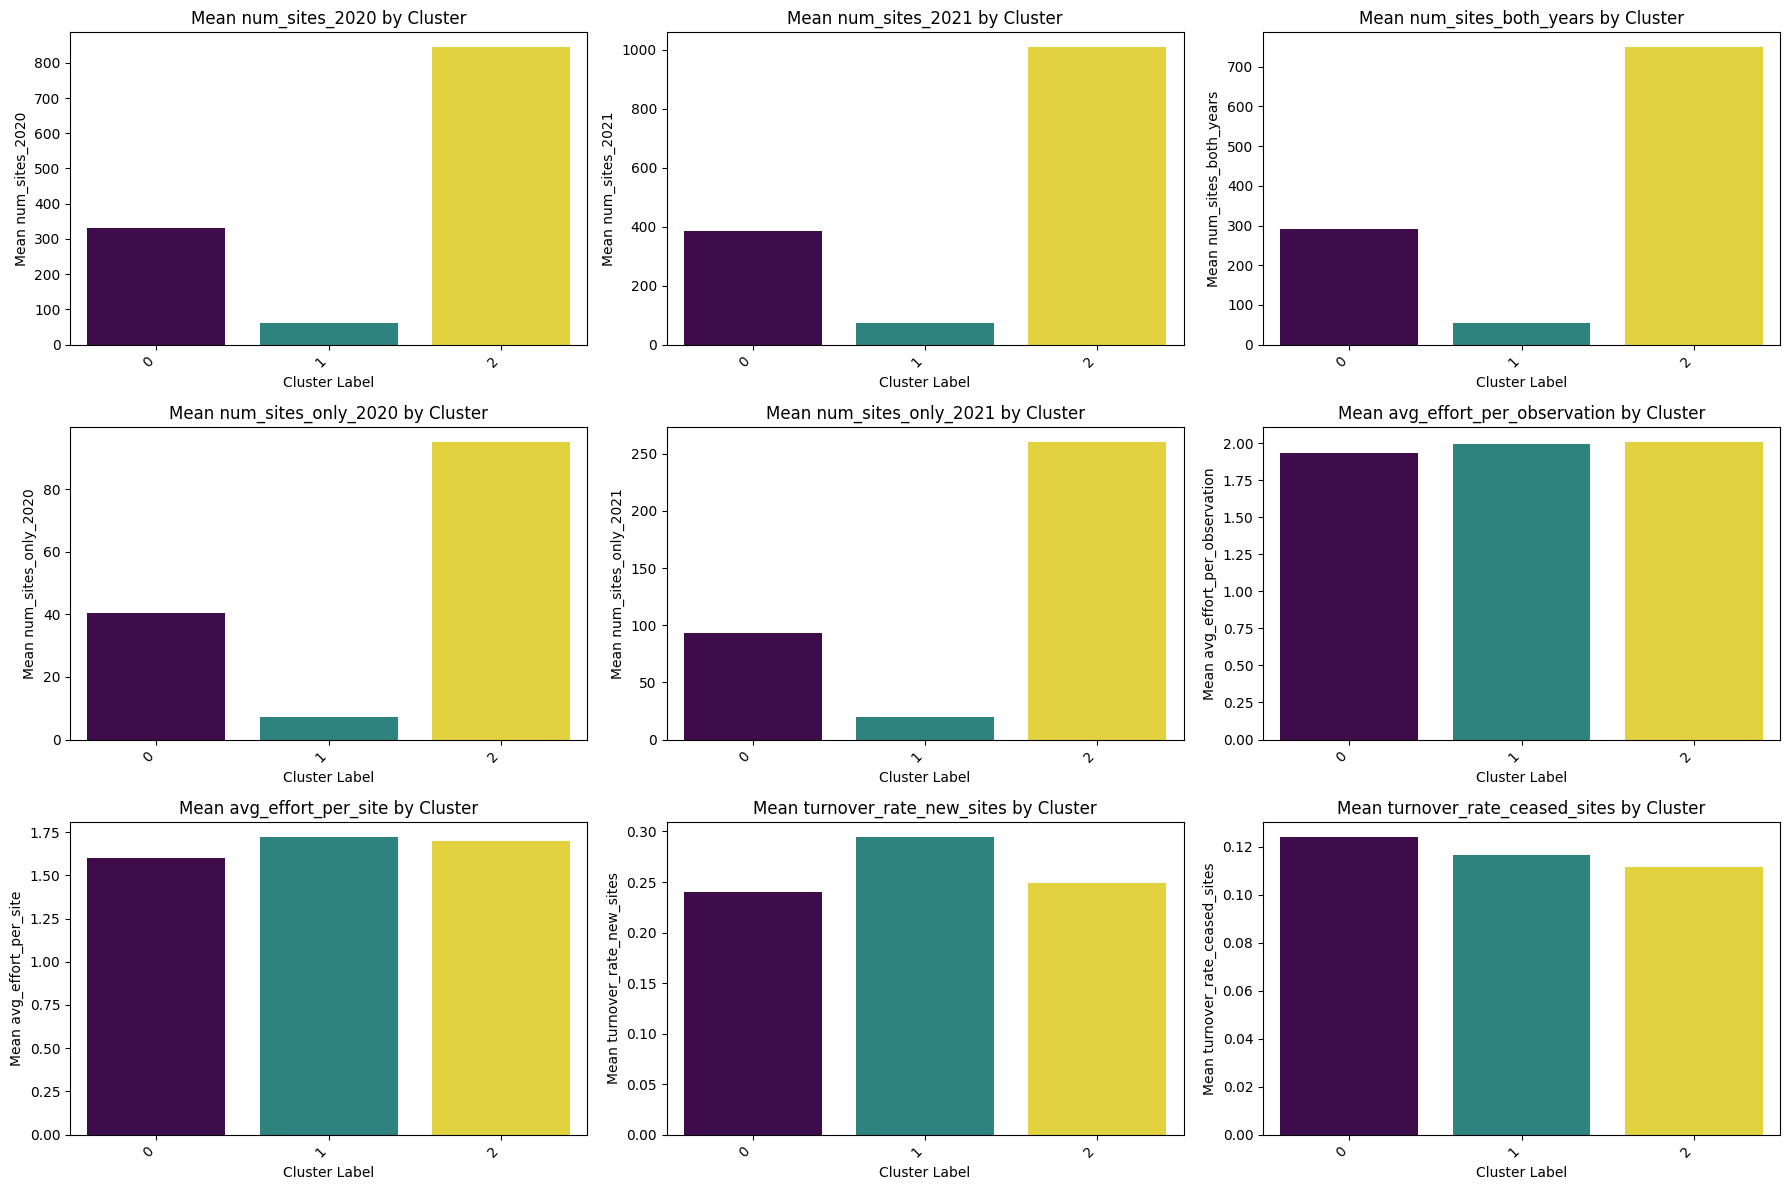

Visualized mean values of features for each cluster.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the mean values for each feature per cluster
cluster_means = df_clustering_features.groupby('cluster_label').mean()

# Determine the number of features and set up the plot grid dynamically
num_features = cluster_means.shape[1]
num_cols_plot = 3 # Max 3 plots per row
num_rows_plot = (num_features + num_cols_plot - 1) // num_cols_plot # Ceiling division

plt.figure(figsize=(num_cols_plot * 6, num_rows_plot * 4))

for i, column in enumerate(cluster_means.columns):
    plt.subplot(num_rows_plot, num_cols_plot, i + 1)
    sns.barplot(x=cluster_means.index, y=cluster_means[column], palette='viridis', hue=cluster_means.index, legend=False)
    plt.title(f'Mean {column} by Cluster')
    plt.xlabel('Cluster Label')
    plt.ylabel(f'Mean {column}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Visualized mean values of features for each cluster.")

## Summary:

### Data Analysis Key Findings

*   **State-Level Temporal Metrics:** A `df_state_metrics` DataFrame was successfully created, aggregating data to the state level. It includes counts of unique sites for 2020, 2021, sites present in both years, and sites present in only one year. For example, for 'CA-BC', 262 unique sites reported in 2020 and 317 in 2021, with 224 sites reporting in both years.
*   **Effort Distribution:** The average `effort_hrs_atleast` per observation and per site was calculated for each state. For 'CA-BC', the average effort was 1.76 hours per observation and 1.48 hours per site.
*   **Site Turnover Rates:** Turnover rates for new and ceased sites were computed. For 'CA-BC', the new site turnover rate was approximately 29.3%, and the ceased site turnover rate was about 14.5%.
*   **Correlation Analysis of Numerical Features:** A correlation matrix for numerical features in the main dataset (`df_merged`) was generated. The analysis highlighted strongly correlated pairs, such as `fed_in_jul` and `fed_in_aug`, which showed a very high positive correlation of 0.966.
*   **Clustering Feature Preparation:** A `df_clustering_features` DataFrame was prepared with 9 selected state-level metrics. Missing values were filled with 0, ensuring data readiness for unsupervised learning across 65 states.
*   **Optimal Number of Clusters:** The Elbow Method, analyzing inertia for K-Means, suggested an optimal number of clusters (`k`) around 3 or 4. Based on this, `k=3` was chosen for the K-Means model. Silhouette Scores were also calculated to further evaluate cluster quality across different `k` values.
*   **Identification of Three State Participation Regimes:** K-Means clustering successfully grouped states into three distinct regimes based on their temporal participation metrics.
    *   **Cluster 0 ('Average Participation' Regime):** Characterized by moderate site counts, moderate site persistence, and average effort levels.
    *   **Cluster 1 ('Low Participation & High Turnover' Regime):** Characterized by significantly lower site counts overall and the highest turnover rate for new sites (around 29.4%).
    *   **Cluster 2 ('High Participation & High Stability' Regime):** Characterized by a very high number of participating sites and strong site persistence (highest number of sites reporting in both years).
*   **Vulnerability to Bias Assessment:**
    *   **Cluster 1 is identified as the most vulnerable** to producing biased or unreliable ecological inferences due to its small sample size and significant site instability.
    *   **Cluster 0 is moderately vulnerable**, as some site turnover might affect long-term trend analysis.
    *   **Cluster 2 is the least vulnerable**, offering the most robust and trustworthy data for ecological studies due to its extensive site coverage and strong temporal persistence.

### Insights or Next Steps

*   The identified state-level participation regimes provide a valuable framework for understanding the varying reliability and robustness of ecological data across different states. This can inform targeted strategies for data collection enhancement or resource allocation, focusing on states in 'Low Participation & High Turnover' regimes.
*   When interpreting ecological inferences, especially those involving trend analysis over time, it is crucial to consider the cluster a state belongs to, as this directly impacts the potential for bias and the overall trustworthiness of the findings.
